In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_Sept2022.xlsx', sheet_name='Opx-Liq')
myOpxs1=out['Opxs']
myLiquids1=out['Liqs']
Opx_Glass=out['my_input']
notinLEPR= Opx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Opx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Opx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Opx_Glass['P_kbar_x']<13
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

Eq_tests=pt.calculate_orthopyroxene_liquid_components(liq_comps=myLiquids1, opx_comps=myOpxs1,
                                                      Fe3Fet_Liq=0)


C:\Users\penny\AppData\Local\Temp\ipykernel_11656\3573331258.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Opx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Opx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


In [4]:
Put_28a_GlobalP=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1,
                                         
            opx_comps=myOpxs1, equationT="T_Put2008_eq28a",equationP="P_Put_Global_Opx").T_K_calc

Out_Global_FixedT=pt.calculate_opx_liq_press(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put_Global_Opx")


Opx_only29c_with28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put2008_eq29c", equationT="T_Put2008_eq28a")

## Assesing sensitivity to H2O content and other variables

In [5]:
#Filt=[596, 624, 700, 415, 354, 309, 525, 618, 513, 478, 631, 291, 290,
       # 541, 430, 675, 505, 318, 359, 378, 522, 358, 562, 564, 651, 514,
       # 637, 384, 498, 372, 344, 456, 315, 573, 282, 662, 338]

In [6]:
#rand_choice=Opx_Glass.loc[Opx_Glass['H2O_Liq'].loc[Filt]>0].index.values
#choose=np.random.choice(rand_choice, 40)
#choose
Filt=[212,  64, 261, 210, 264, 114,  61, 257, 153, 119, 325, 226, 126,
       219, 365, 153, 182, 361, 201,  59, 159, 105, 326,  75, 307, 250,
       250,  70, 176,  89, 156, 195,  85, 362, 260, 237, 350, 279, 383,
       318]

In [7]:
len(Filt)

40

In [7]:
delta_H_lin=np.linspace(-3, 3, 50)
TH_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
TH_28a_29a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)

TH_28b=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
TH_Beatt=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    
    TH_28a_29a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29a",
                equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).T_K_calc

    TH_28a[i]=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],
                equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])

    TH_28b[i]=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],
                equationT="T_Put2008_eq28b_opx_sat",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])

    TH_Beatt[i]=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],
                equationT="T_Beatt1993_opx",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])


In [8]:
delta_P_lin=np.linspace(-5, 5, 50)
TP_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
TP_28b=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
TP_Beatt=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    


    TP_28a[i]=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt]+delta_P_lin[i],
                equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

    TP_28b[i]=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt]+delta_P_lin[i],
                equationT="T_Put2008_eq28b_opx_sat",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])

    TP_Beatt[i]=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt]+delta_P_lin[i],
                equationT="T_Beatt1993_opx",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])


Exp_28a=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],
            equationT="T_Put2008_eq28a",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

Exp_28b=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],
            equationT="T_Put2008_eq28b_opx_sat",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

Exp_Beatt=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],
            equationT="T_Beatt1993_opx",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

In [9]:
delta_T_lin=np.linspace(-100, 100, 50)
PT_Pet_29a=np.empty([len(delta_T_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PT_Pet_29b=np.empty([len(delta_T_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PT_Pet_29c=np.empty([len(delta_T_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PT_Pet_Fel=np.empty([len(delta_T_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PT_Pet_Glob=np.empty([len(delta_T_lin), len(Opx_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_T_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    PT_Pet_29a[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
        T=Opx_Glass['T_K_x'].loc[Filt]+delta_T_lin[i])
    
    PT_Pet_29b[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29b",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
        T=Opx_Glass['T_K_x'].loc[Filt]+delta_T_lin[i])

    PT_Pet_29c[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29c",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
        T=Opx_Glass['T_K_x'].loc[Filt]+delta_T_lin[i])

    PT_Pet_Glob[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Global_Opx",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
        T=Opx_Glass['T_K_x'].loc[Filt]+delta_T_lin[i])
    
    PT_Pet_Fel[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Felsic_Opx",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
        T=Opx_Glass['T_K_x'].loc[Filt]+delta_T_lin[i])
    
    
    PT_Pet_29a[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
        T=Opx_Glass['T_K_x'].loc[Filt]+delta_T_lin[i])
    


## Iterate for H sensitivity

In [10]:
delta_H_lin=np.linspace(-3, 3, 50)
PH_Pet_29a_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PH_Pet_29b_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PH_Pet_29c_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PH_Pet_Fel_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PH_Pet_Glob_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)


PH_Pet_29a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PH_Pet_29b=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PH_Pet_29c=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PH_Pet_Fel=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
PH_Pet_Glob=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)



TH_Pet_29a_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)

TH_Pet_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
TH_Pet_28b=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
TH_Pet_Beatt=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)

TH_Pet_29b_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
TH_Pet_29c_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
TH_Pet_Fel_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)
TH_Pet_Glob_28a=np.empty([len(delta_H_lin), len(Opx_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_T_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
    ## Temperature only
    
    TH_Pet_28a[i]=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],                          
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])
    
    TH_Pet_28b[i]=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],                          
        equationT="T_Put2008_eq28b_opx_sat",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])
 
    TH_Pet_Beatt[i]=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],                          
        equationT="T_Beatt1993_opx",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])
    
    ## Pressure only
    PH_Pet_29a[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
        equationP="P_Put2008_eq29a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])
    
    PH_Pet_29b[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
        equationP="P_Put2008_eq29b",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])    
    
    PH_Pet_29c[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
        equationP="P_Put2008_eq29c",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]) 
    
    
    PH_Pet_Fel[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
        equationP="P_Put_Felsic_Opx",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])
    
    PH_Pet_Glob[i]=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
        equationP="P_Put_Global_Opx",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i])
    
    ## Iterative calculations
    
    PH_Pet_29a_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29a",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).P_kbar_calc

    TH_Pet_29a_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29a",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).T_K_calc    

    PH_Pet_29b_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29b",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).P_kbar_calc
    
    TH_Pet_29b_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29b",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).T_K_calc
    

    
    PH_Pet_29c_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29c",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).P_kbar_calc

    TH_Pet_29c_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29c",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).T_K_calc
    
    PH_Pet_Fel_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Felsic_Opx",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).P_kbar_calc
    
    TH_Pet_Fel_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Felsic_Opx",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).T_K_calc
    
    PH_Pet_Glob_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Global_Opx",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).P_kbar_calc
    
    TH_Pet_Glob_28a[i]=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Global_Opx",
        equationT="T_Put2008_eq28a",
        H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).T_K_calc
    


In [13]:
## Temp only

Exp_Pet_28a=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],
    equationT="T_Put2008_eq28a",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])


Exp_Pet_28b=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],
    equationT="T_Put2008_eq28b_opx_sat",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

Exp_Pet_Beatt=pt.calculate_opx_liq_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], P=Opx_Glass['P_kbar_x'].loc[Filt],
    equationT="T_Beatt1993_opx",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

## Pressure only

Exp_Pet_29a=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
    equationP="P_Put2008_eq29a",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

Exp_Pet_29b=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
    equationP="P_Put2008_eq29b",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])    

Exp_Pet_29c=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
    equationP="P_Put2008_eq29c",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt]) 


Exp_Pet_Fel=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
    equationP="P_Put_Felsic_Opx",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

Exp_Pet_Glob=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], T=Opx_Glass['T_K_x'].loc[Filt],                          
    equationP="P_Put_Global_Opx",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

## Iterativeones

Exp_Pet_29a_28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29a",
    equationT="T_Put2008_eq28a",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])



Exp_Pet_29b_28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29b",
    equationT="T_Put2008_eq28a",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

Exp_Pet_29c_28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29c",
    equationT="T_Put2008_eq28a",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

Exp_Pet_Fel_28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Felsic_Opx",
    equationT="T_Put2008_eq28a",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

Exp_Pet_Glob_28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Global_Opx",
    equationT="T_Put2008_eq28a",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt])

In [14]:
Exp_Pet_29a=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29a",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
    T=Opx_Glass['T_K_x'].loc[Filt])

Exp_Pet_29b=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29b",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
    T=Opx_Glass['T_K_x'].loc[Filt])

Exp_Pet_29c=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put2008_eq29c",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
    T=Opx_Glass['T_K_x'].loc[Filt])

Exp_Pet_Glob=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Global_Opx",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
    T=Opx_Glass['T_K_x'].loc[Filt])

Exp_Pet_Fel=pt.calculate_opx_liq_press(liq_comps=myLiquids1.loc[Filt], 
    opx_comps=myOpxs1.loc[Filt], equationP="P_Put_Felsic_Opx",
    H2O_Liq=Opx_Glass['H2O_Liq'].loc[Filt],
    T=Opx_Glass['T_K_x'].loc[Filt])

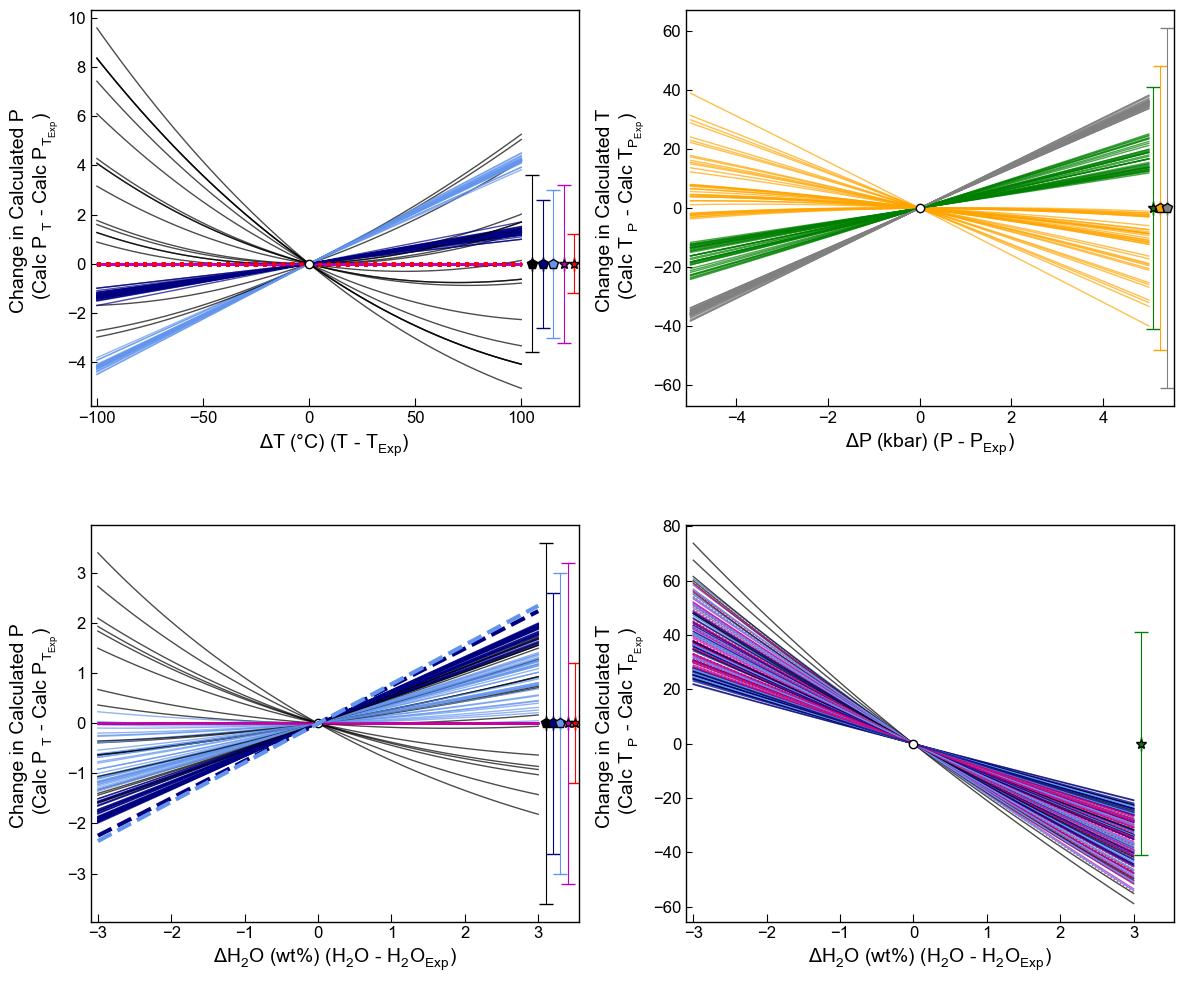

In [15]:
fig, ((ax1, ax2),  (ax5, ax6)) = plt.subplots(2, 2, figsize=(12,10))


for i in range(0, np.shape(PT_Pet_29b)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    
 

    
    ### Temperature sensitivity of barometers
    ax1.plot(delta_T_lin, -(Exp_Pet_29b.iloc[i]- PT_Pet_29b[:, i]), 
                '-', color='cornflowerblue', alpha=0.7, lw=1)
    
    ax1.plot(delta_T_lin, -(Exp_Pet_29a.iloc[i]- PT_Pet_29a[:, i]), 
                '-', color='navy', alpha=0.7, lw=1)    

    ax1.plot(delta_T_lin, -(Exp_Pet_29c.iloc[i]- PT_Pet_29c[:, i]), 
                '-', color='black', alpha=0.7, lw=1)     
    
    ax1.plot(delta_T_lin, -(Exp_Pet_Glob.iloc[i]- PT_Pet_Glob[:, i]), 
                '-', color='m', alpha=0.7, lw=1)
    
    ax1.plot(delta_T_lin, -(Exp_Pet_Fel.iloc[i]- PT_Pet_Fel[:, i]), 
                ':', color='red', alpha=0.7, lw=2.5)
    
    ## Pressure sensitivity of thermometers
    
    ax2.plot(delta_P_lin, -(Exp_28a.iloc[i]- TP_28a[:, i]), 
                '-', color='green', alpha=0.7, lw=1)    

    ax2.plot(delta_P_lin, -(Exp_28b.iloc[i]- TP_28b[:, i]), 
                '-', color='orange', alpha=0.7, lw=1) 
    
    ax2.plot(delta_P_lin, -(Exp_Beatt.iloc[i]- TP_Beatt[:, i]), 
                '-', color='grey', alpha=0.7, lw=1) 
    
    
    ## ax5 change in water for iterative calculations for pressure
    
 
    ax5.plot(delta_H_lin, -(-PH_Pet_Fel_28a[:, i]+Exp_Pet_Fel_28a.P_kbar_calc.iloc[i]),
             ':', color='r', alpha=0.7, lw=1)
    ## ax6 - change in temperature or calculated water 
  
    ax5.plot(delta_H_lin, -(-PH_Pet_29a_28a[:, i]+Exp_Pet_29a_28a.P_kbar_calc.iloc[i]), '-', 
             color='navy', alpha=0.7, lw=1)
    ax5.plot(delta_H_lin, -(-PH_Pet_29b_28a[:, i]+Exp_Pet_29b_28a.P_kbar_calc.iloc[i]), '-',
            color='cornflowerblue', alpha=0.7, lw=1)
    ax5.plot(delta_H_lin, -(-PH_Pet_29c_28a[:, i]+Exp_Pet_29c_28a.P_kbar_calc.iloc[i]),
             '-', color='black', alpha=0.7, lw=1)
    ax5.plot(delta_H_lin, -(-PH_Pet_Glob_28a[:, i]+Exp_Pet_Glob_28a.P_kbar_calc.iloc[i]),
             '-', color='m', alpha=0.7, lw=1)

    ax6.plot(delta_H_lin, -(-TH_Pet_Glob_28a[:, i]+Exp_Pet_Glob_28a.T_K_calc.iloc[i]),
             '-', color='m', alpha=0.7, lw=1)  
    
    ax6.plot(delta_H_lin, -(-TH_Pet_Fel_28a[:, i]+Exp_Pet_Fel_28a.T_K_calc.iloc[i]),
             ':', color='r', alpha=0.7, lw=1)  
    ax6.plot(delta_H_lin, -(-TH_Pet_29c_28a[:, i]+Exp_Pet_29c_28a.T_K_calc.iloc[i]),
             '-', color='k', alpha=0.7, lw=1)
        
    ax6.plot(delta_H_lin, -(-TH_Pet_29a_28a[:, i]+Exp_Pet_29a_28a.T_K_calc.iloc[i]), 
             color='navy', alpha=0.7, lw=1)

    ax6.plot(delta_H_lin, -(-TH_Pet_29b_28a[:, i]+Exp_Pet_29b_28a.T_K_calc.iloc[i]), '-',
            color='cornflowerblue', alpha=1, lw=1)    
## Errorbars on temperature
# Eq28a - Test data
ax2.errorbar(5.1,0,
             xerr=0, yerr=41,
             fmt='*', ecolor='green', elinewidth=0.8, mfc='green', ms=7, mec='k', capsize=5)
ax6.errorbar(3.1,0,
             xerr=0, yerr=41,
             fmt='*', ecolor='green', elinewidth=0.8, mfc='green', ms=7, mec='k', capsize=5)
# Eq28b - Global calibration data
ax2.errorbar(5.25, 0,
             xerr=0, yerr=48,
             fmt='p', ecolor='orange', elinewidth=0.8, mfc='orange', ms=7, mec='k', capsize=5)
    
# beattie - Global calibration data
ax2.errorbar(5.4, 0, 
             xerr=0, yerr=61,
             fmt='p', ecolor='grey', elinewidth=0.8, mfc='grey', ms=7, mec='k', capsize=5)
    
    
    
## Errorbars on pressure - 
# 29c - hydrous
ax1.errorbar(105,0,
             xerr=0, yerr=3.6,
             fmt='p', ecolor='black', elinewidth=0.8, mfc='black', ms=7, mec='k', capsize=5)

# 29a
ax1.errorbar(110,0,
             xerr=0, yerr=2.6,
             fmt='p', ecolor='navy', elinewidth=0.8, mfc='navy', ms=7, mec='k', capsize=5)
# 29b
ax1.errorbar(115,0,
             xerr=0, yerr=3,
             fmt='p', ecolor='cornflowerblue', elinewidth=0.8, mfc='cornflowerblue', ms=7, mec='k', capsize=5)
# Global
ax1.errorbar(120,0,
             xerr=0, yerr=3.2,
             fmt='*', ecolor='m', elinewidth=0.8, mfc='m', ms=7, mec='k', capsize=5)
# Global
ax1.errorbar(125,0,
             xerr=0, yerr=1.2,
             fmt='*', ecolor='r', elinewidth=0.8, mfc='r', ms=7, mec='k', capsize=5)


## Errorbars on pressure - 
# 29c - hydrous
ax5.errorbar(3.1,0,
             xerr=0, yerr=3.6,
             fmt='p', ecolor='black', elinewidth=0.8, mfc='black', ms=7, mec='k', capsize=5)

# 29a
ax5.errorbar(3.2,0,
             xerr=0, yerr=2.6,
             fmt='p', ecolor='navy', elinewidth=0.8, mfc='navy', ms=7, mec='k', capsize=5)
# 29b
ax5.errorbar(3.3,0,
             xerr=0, yerr=3,
             fmt='p', ecolor='cornflowerblue', elinewidth=0.8, mfc='cornflowerblue', ms=7, mec='k', capsize=5)
# Global
ax5.errorbar(3.4,0,
             xerr=0, yerr=3.2,
             fmt='*', ecolor='m', elinewidth=0.8, mfc='m', ms=7, mec='k', capsize=5)
# Global
ax5.errorbar(3.5,0,
             xerr=0, yerr=1.2,
             fmt='*', ecolor='r', elinewidth=0.8, mfc='r', ms=7, mec='k', capsize=5)



ax2.set_xlim([-5.1, 5.55])
ax1.set_xlim([-103, 127])
ax5.set_xlim([-3.1, 3.55])
ax6.set_xlim([-3.1, 3.55])
ax1.set_xlabel('ΔT (°C) (T - T$_{Exp}$)')
ax2.set_xlabel('ΔP (kbar) (P - P$_{Exp}$)')

ax1.set_ylabel('Change in Calculated P \n (Calc P $_{T}$ - Calc P$_{T_{Exp} }$)')
ax2.set_ylabel('Change in Calculated T \n (Calc T $_{P}$ - Calc T$_{P_{Exp} }$)')
ax5.set_ylabel('Change in Calculated P \n (Calc P $_{T}$ - Calc P$_{T_{Exp} }$)')
ax6.set_ylabel('Change in Calculated T \n (Calc T $_{P}$ - Calc T$_{P_{Exp} }$)')


ax5.set_xlabel('ΔH$_2$O (wt%) (H$_2$O - H$_2$O$_{Exp}$)')
ax6.set_xlabel('ΔH$_2$O (wt%) (H$_2$O - H$_2$O$_{Exp}$)')
#ax5.set_ylabel('Change in Calculated P \n (Calc P $_{H{_2}O}$ - Calc P$_{H{_2}O_{Exp} }$)')


ax1.plot(0, 0, 'ok', mfc='white')
ax2.plot(0, 0, 'ok', mfc='white')
ax5.plot(0, 0, 'ok', mfc='white')
ax6.plot(0, 0, 'ok', mfc='white')

# ax5.plot(delta_H_lin, PH_Pet_29b[:, i]-Exp_Pet_29b.iloc[i], '-', color='cornflowerblue')
# ax5.plot(delta_H_lin, PH_Pet_29c[:, i]-Exp_Pet_29c.iloc[i], '-', color='k')
ax5.plot(delta_H_lin, PH_Pet_29a[:, 2]-Exp_Pet_29a.iloc[2], '--', color='navy', lw=3)
ax5.plot(delta_H_lin, PH_Pet_29b[:, 2]-Exp_Pet_29b.iloc[2], '--', color='cornflowerblue', lw=3)

#ax6.plot(delta_H_lin, TH_Pet_28a[:, 2]-Exp_Pet_28a.iloc[2], '--', color='green', lw=4)

#ax2.set_ylim([-1, 1])
fig.tight_layout()


plt.subplots_adjust(wspace=0.22, hspace=0.3)

fig.savefig('OpxLiqBarometrySensitivity.png', dpi=200)

